# Step 1: Exploratory Data Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_15872\395676884.py:7: DtypeWarning: Columns (58,71,90,96,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw_data.csv')


Shape of dataset: (521100, 106)

Column names:
 ['[control]genre', '[control]player_id', '[control]session_id', '[control]game', '[control]epoch', '[control]time_stamp', '[control]engine_tick', '[string]key_press_count', '[string]key_presses', 'idle_time', 'player_standing', 'player_score', 'player_speed', 'player_speed_boost', 'player_is_grounded', 'player_is_mid_air', 'player_is_looping', 'player_is_crashing', 'player_is_off_road', 'player_gas_pedal', 'player_steering', 'player_lap', 'player_distance_to_way_point', 'player_delta_distance', 'player_delta_rotation', 'player_respawn', 'visible_bot_count', 'bot_standing', 'bot_score', 'bot_speed', 'bot_speed_boost', 'bot_is_grounded', 'bot_is_looping', 'bot_is_off_road', 'bot_is_crashing', 'bot_gas_pedal', 'bot_steering', 'bot_lap', 'bot_distance_to_way_point', 'bot_delta_distance', 'bot_delta_rotation', 'bot_player_distance', 'bot_respawn', 'visible_jump_count', 'visible_speed_boost_count', 'visible_obstacle_count', 'visible_loop_count'

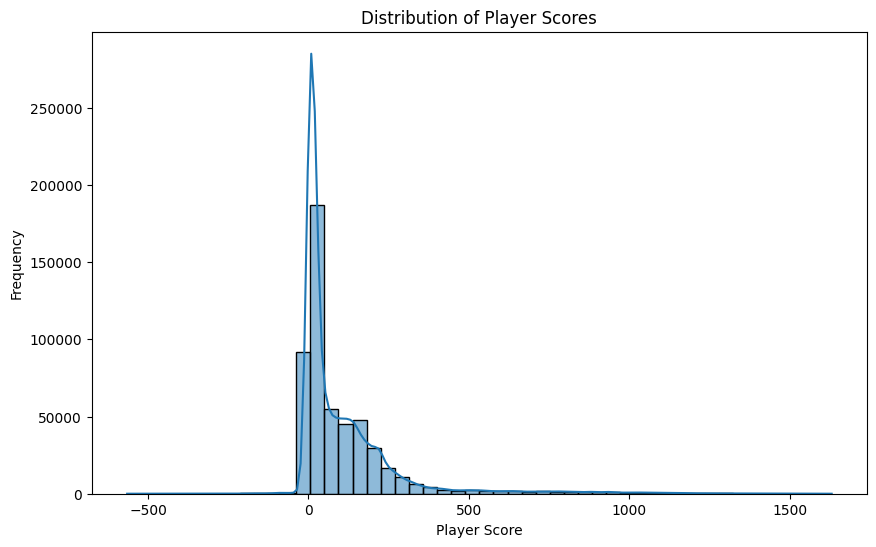

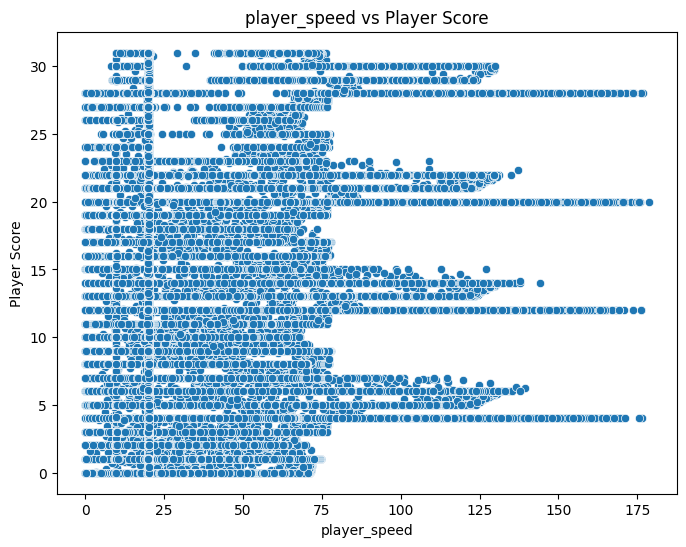

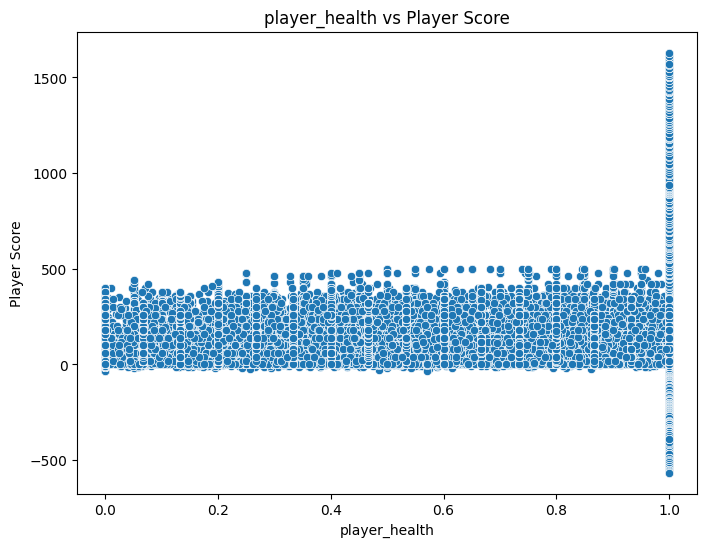

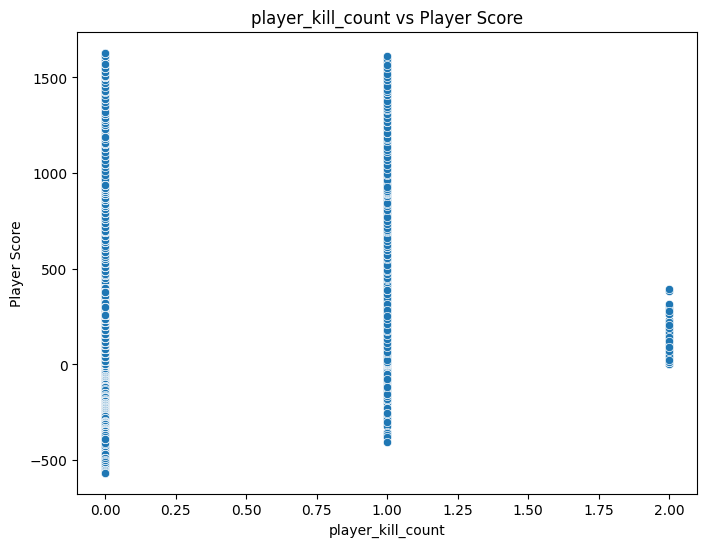

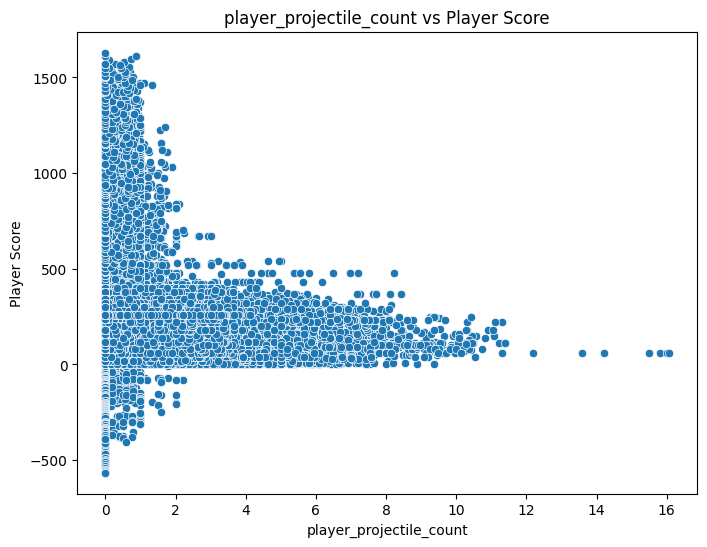

KeyboardInterrupt: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset from CSV
df = pd.read_csv('raw_data.csv')

# Basic data overview
print("Shape of dataset:", df.shape)  # Displays the number of rows and columns
print("\nColumn names:\n", df.columns.tolist())  # Lists all column names
print("\nData types:\n", df.dtypes)  # Shows the data type of each column
print("\nFirst few rows:\n", df.head())  # Prints the first 5 rows for a quick preview

# Check for missing values in the dataset
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nMissing values:\n", missing)  # Displays only columns with missing values

# Generate summary statistics (mean, std, min, max, etc.)
print("\nSummary statistics:\n", df.describe(include='all'))  # Includes all columns, even non-numeric ones

# Plot the distribution of player scores
plt.figure(figsize=(10, 6))
sns.histplot(df['player_score'].dropna(), bins=50, kde=True)  # Histogram with kernel density estimate
plt.title('Distribution of Player Scores')
plt.xlabel('Player Score')
plt.ylabel('Frequency')
plt.show()

# Scatter plots of player score against selected gameplay features
features_to_plot = ['player_speed', 'player_health', 'player_kill_count', 'player_projectile_count']

# Iterate through selected features and plot them against player_score
for feature in features_to_plot:
    if feature in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[feature], y=df['player_score'])  # Relationship between gameplay feature and player_score
        plt.title(f'{feature} vs Player Score')
        plt.xlabel(feature)
        plt.ylabel('Player Score')
        plt.show()

# Plot player score over time (uses raw timestamps to show temporal trends)
timestamps = df['[control]time_stamp'].tolist()  # Extract timestamps
player_scores = df['player_score'].tolist()  # Extract scores

relative_time = np.array(timestamps) - timestamps[0]  # Convert to time since session start

plt.figure(figsize=(12, 6))
plt.plot(relative_time, player_scores, marker='o')  # Line plot showing score progression
plt.xlabel('Time Since Start (s)')
plt.ylabel('Player Score')
plt.title('Player Score Over Relative Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the number of samples per genre if genre column is present
if '[control]genre' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='[control]genre')  # Bar plot of genre distribution
    plt.title('Game Genre Distribution')
    plt.show()


# Step 2: Data Cleaning

In [1]:
# Load dataset: Takes in path to the CSV file, returns dataframe if successful, otherwise none
def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully. Shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Clean dataframe: Removes duplicate and reports missing values, returns cleaned dataframe
def clean_dataset(df):
    if df is None:
        return None

    # Report total number of missing values in the dataset
    missing_total = df.isnull().sum().sum()
    print(f"Total missing values: {missing_total}")

    # Remove any duplicate rows
    duplicates = df.duplicated().sum()
    df = df.drop_duplicates()
    print(f"Duplicate rows removed: {duplicates}")

    # Reset index after cleaning
    df = df.reset_index(drop=True)

    print(f"Cleaned dataset shape: {df.shape}")
    return df

# Main execution
file_path = 'raw_data.csv'  # Define the path to the raw data file
raw_df = load_dataset(file_path)  # Load the dataset
clean_df = clean_dataset(raw_df)  # Clean the dataset

# Save cleaned data to a new CSV file
if clean_df is not None:
    clean_df.to_csv('cleaned_data.csv', index=False)
    print("Cleaned dataset saved")
    print(clean_df.head())


C:\Users\user\AppData\Local\Temp\ipykernel_5140\3858772288.py:8: DtypeWarning: Columns (58,71,90,96,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset loaded successfully. Shape: (521100, 106)
Total missing values: 28663901
Duplicate rows removed: 1
Cleaned dataset shape: (521099, 106)
Cleaned dataset saved
  [control]genre                    [control]player_id  \
0     Platformer  C0ABDBF6-67EF-EA64-A2D1-42FA92BD5713   
1     Platformer  C0ABDBF6-67EF-EA64-A2D1-42FA92BD5713   
2     Platformer  C0ABDBF6-67EF-EA64-A2D1-42FA92BD5713   
3     Platformer  C0ABDBF6-67EF-EA64-A2D1-42FA92BD5713   
4     Platformer  C0ABDBF6-67EF-EA64-A2D1-42FA92BD5713   

                    [control]session_id [control]game  [control]epoch  \
0  0135ECD3-406E-84FD-C35D-5DB6C9B625A9       Endless    1.590536e+12   
1  0135ECD3-406E-84FD-C35D-5DB6C9B625A9       Endless    1.590536e+12   
2  0135ECD3-406E-84FD-C35D-5DB6C9B625A9       Endless    1.590536e+12   
3  0135ECD3-406E-84FD-C35D-5DB6C9B625A9       Endless    1.590536e+12   
4  0135ECD3-406E-84FD-C35D-5DB6C9B625A9       Endless    1.590536e+12   

   [control]time_stamp  [control]engine_tick  

# Step 3: Feature Engineering

In [10]:
import pandas as pd
import numpy as np

# Load cleaned dataset from CSV to a dataframe
df = pd.read_csv('cleaned_data.csv', low_memory=False)

# Replace common textual empty indicators with actual NaN for consistency
df.replace(['', ' ', 'nan', 'NaN', 'None'], np.nan, inplace=True)

# Get the list of unique genres, excluding any NaNs
genres = df['[control]genre'].dropna().unique()

# Process each genre separately
for genre in genres:
    # Create a copy of the dataframe filtered by genre
    genre_df = df[df['[control]genre'] == genre].copy()

    # Drop columns that are entirely empty
    genre_df.dropna(axis=1, how='all', inplace=True)

    # Remove the key press column if it exists (it's not useful for modeling)
    genre_df.drop(columns=['[string]key_presses'], inplace=True)

    # Keep session_id, epoch, time_stamp, these columns are related to session/timing and should not be encoded
    session_cols = ['[control]session_id', '[control]epoch', '[control]time_stamp']

    # Identify remaining string columns
    string_cols = genre_df.select_dtypes(include=['object']).columns.tolist()

    # Filter out session columns from the list of string columns
    encode_cols = [col for col in string_cols if col not in session_cols]

    # Make sure only columns that still exist in the dataframe are included
    existing_encode_cols = [col for col in encode_cols if col in genre_df.columns]

     # Convert categorical string columns into binary indicator columns
    if existing_encode_cols:
        genre_df = pd.get_dummies(genre_df, columns=existing_encode_cols)

    # Replace spaces in genre names with underscores and save the file
    filename = f'{genre}_data.csv'.replace(' ', '_')
    genre_df.to_csv(filename, index=False)

    print(f"Saved {genre} dataset to {filename} with shape: {genre_df.shape}")

Saved Platformer dataset to Platformer_data.csv with shape: (175811, 235)
Saved Racing dataset to Racing_data.csv with shape: (172663, 171)
Saved Shooter dataset to Shooter_data.csv with shape: (172625, 204)


# Step 4: LSTM Neural Network and Feature Ranking


=== Processing genre: Platformer ===


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


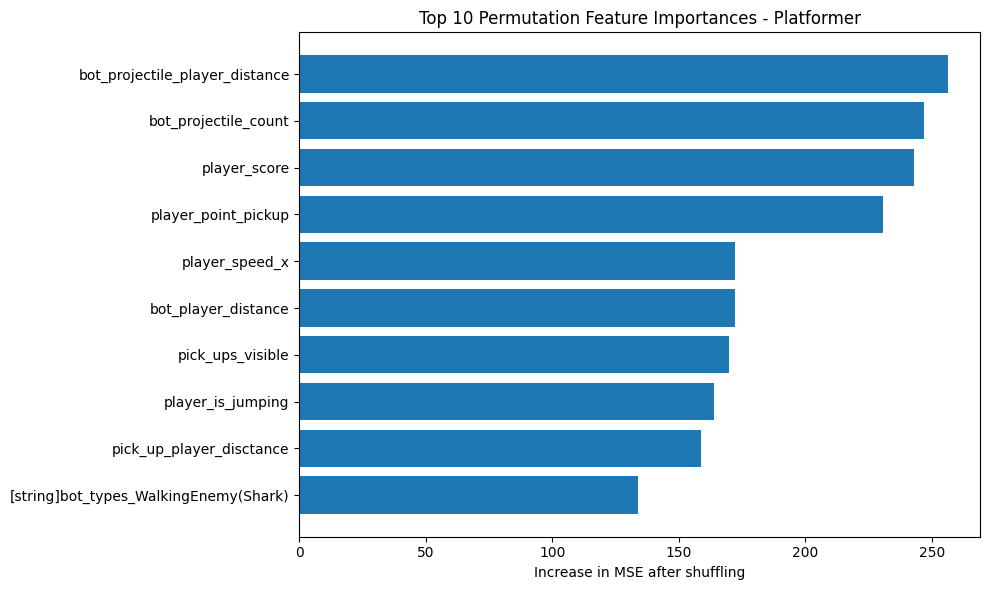


=== Processing genre: Racing ===


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


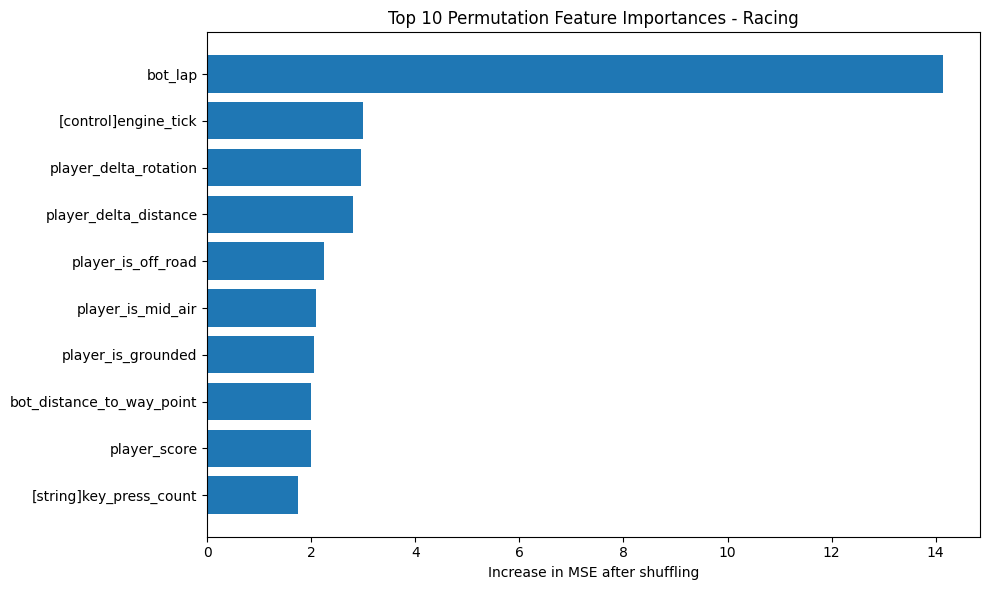


=== Processing genre: Shooter ===


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


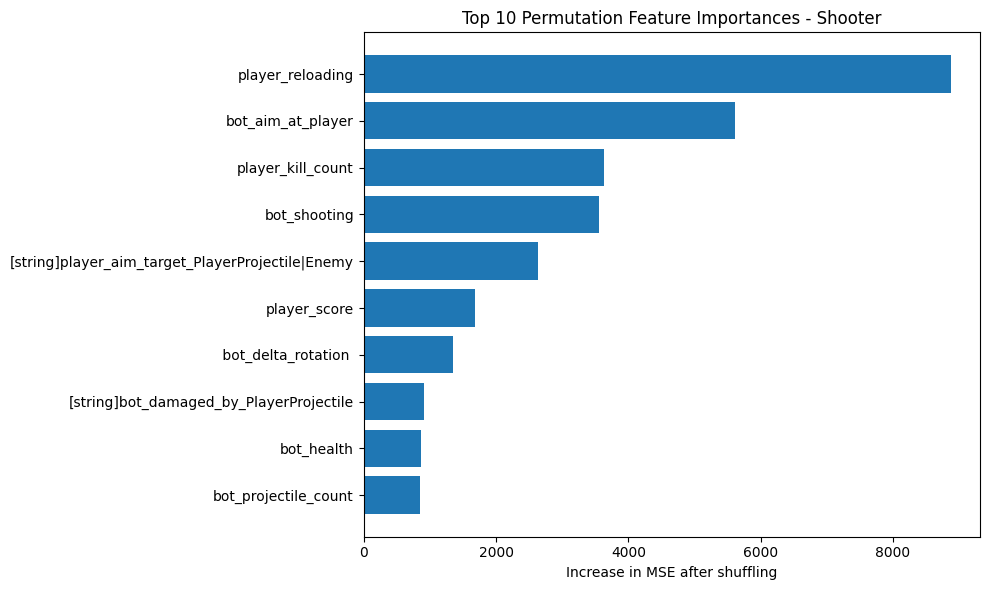


=== Summary of Results by Genre ===

Genre: Platformer
  genre: Platformer
  MAE: 43.305397033691406
  MSE: 4024.90869140625
  RMSE: 63.442169189453125
  R² Score: 0.4325
  Explained Variance: 0.4424
  Model Parameters:
    LSTM Units: 256
    Dense Units: 64
    Dropout 1: 0.3
    Dropout 2: 0.2
    Learning Rate: 0.001
    Sequence Length: 20
    Batch Size: 16
    Epochs: 8
    Validation Split: 0.2
    Early Stopping Patience: 5

Genre: Racing
  genre: Racing
  MAE: 4.619429588317871
  MSE: 39.940895080566406
  RMSE: 6.319880962371826
  R² Score: 0.4200
  Explained Variance: 0.4203
  Model Parameters:
    LSTM Units: 256
    Dense Units: 64
    Dropout 1: 0.3
    Dropout 2: 0.2
    Learning Rate: 0.001
    Sequence Length: 20
    Batch Size: 16
    Epochs: 7
    Validation Split: 0.2
    Early Stopping Patience: 5

Genre: Shooter
  genre: Shooter
  MAE: 83.51615142822266
  MSE: 18049.73046875
  RMSE: 134.3492889404297
  R² Score: 0.6954
  Explained Variance: 0.7023
  Model Paramet

In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Parameters
SEQUENCE_LENGTH = 20             # How many time steps to include in each LSTM input
LSTM_UNITS = 256                 # Number of units in the LSTM layer
DENSE_UNITS = 64                 # Number of units in the dense (fully-connected) layer
DROPOUT_RATE_1 = 0.3             # Dropout after LSTM layer (to reduce overfitting)
DROPOUT_RATE_2 = 0.2             # Dropout after dense layer
LEARNING_RATE = 0.001            # Learning rate for the optimizer
BATCH_SIZE = 16                  # Number of samples per gradient update
EPOCHS = 20                      # Maximum number of epochs
EARLY_STOPPING_PATIENCE = 5      # Stop early if validation loss does not improve for 5 epochs
VALIDATION_SPLIT = 0.2          # 20% of training data used for validation
TARGET_COL = 'player_score'     # Target variable to predict
GENRE_FILES = ['Platformer_data.csv', 'Racing_data.csv', 'Shooter_data.csv']  # Datasets by genre

results = []            # Store results by genre
all_y_true = []         # Store all actual player scores (for combined metrics)
all_y_pred = []         # Store all predicted scores

# Permutation feature importance
"""
    Permutes each feature one at a time and measures how much the model's performance degrades.
    Features that cause a large increase in MSE are deemed important.
"""
def permutation_feature_importance(model, X_test, y_test, feature_names, genre_name):
    baseline_preds = model.predict(X_test, verbose=0).flatten()
    baseline_mse = mean_squared_error(y_test, baseline_preds)

    importances = []
    for i in range(X_test.shape[2]):
        X_permuted = copy.deepcopy(X_test)
        np.random.shuffle(X_permuted[:, :, i])  # Shuffle only one feature across time
        preds = model.predict(X_permuted, verbose=0).flatten()
        permuted_mse = mean_squared_error(y_test, preds)
        importances.append(permuted_mse - baseline_mse)

    # Sort features by importance
    sorted_indices = np.argsort(importances)[::-1]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_importances = [importances[i] for i in sorted_indices]

    # Top 10 features
    top_feature_names = sorted_feature_names[:10]
    top_importances = sorted_importances[:10]

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.barh(top_feature_names[::-1], top_importances[::-1])  # Reverse for descending plot
    plt.xlabel("Increase in MSE after shuffling")
    plt.title(f"Top 10 Permutation Feature Importances - {genre_name}")
    plt.tight_layout()
    plt.show()

# Process each dataset
for file in GENRE_FILES:
    genre_name = file.replace('_data.csv', '')
    print(f"\n=== Processing genre: {genre_name} ===")

    # Load data
    df = pd.read_csv(file, low_memory=False)

    # Drop rows with missing target
    df.dropna(subset=[TARGET_COL], inplace=True)

    # Sort by epoch and timestamp for sequential modeling
    df = df.sort_values(by=['[control]epoch', '[control]time_stamp'])

    # Group by session ID to build sequences per player
    grouped = df.groupby('[control]session_id')

    X_sequences = []
    y_sequences = []

    for _, group in grouped:
        # Drop columns with no predictive value
        for col in ['[control]player_id', '[control]session_id', '[control]genre']:
            if col in group.columns:
                group = group.drop(columns=[col])

        # Fill remaining missing values
        group.fillna(0, inplace=True)
        values = group.values

        for i in range(len(values) - SEQUENCE_LENGTH):
            X_seq = values[i:i + SEQUENCE_LENGTH, :]
            y_seq = values[i + SEQUENCE_LENGTH, group.columns.get_loc(TARGET_COL)]
            X_sequences.append(X_seq)
            y_sequences.append(y_seq)

    if not X_sequences:
        print(f"Not enough data for LSTM in genre: {genre_name}")
        continue

    # Convert into arrays
    X = np.array(X_sequences)
    y = np.array(y_sequences)

    # Feature scaling
    n_features = X.shape[2]
    X_scaled = np.zeros_like(X)
    for i in range(len(X)):
        X_scaled[i] = StandardScaler().fit_transform(X[i])

    # Train-test split
    split = int(0.8 * len(X_scaled))
    X_train, X_test = X_scaled[:split], X_scaled[split:]
    y_train, y_test = y[:split], y[split:]

    # Build model
    model = Sequential([
        LSTM(LSTM_UNITS, input_shape=(SEQUENCE_LENGTH, n_features)),
        Dropout(DROPOUT_RATE_1),
        Dense(DENSE_UNITS, activation='relu'),
        Dropout(DROPOUT_RATE_2),
        Dense(1)  # Output layer for regression
    ])

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss=Huber(delta=1.0),
        metrics=['mae']
    )

    # Train model
    early_stop = EarlyStopping(monitor='val_loss', patience=EARLY_STOPPING_PATIENCE, restore_best_weights=True)

    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_train = y_train.astype(np.float32)
    y_test = y_test.astype(np.float32)
    
    history = model.fit(
        X_train, y_train,
        validation_split=VALIDATION_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[early_stop],
        verbose=0
    )

    # Evaluate model
    y_pred = model.predict(X_test, verbose=0).flatten()
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Show which features most influence player score prediction
    cols_to_drop = ['[control]player_id', '[control]session_id', '[control]genre']
    existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
    feature_names = df.drop(columns=existing_cols_to_drop).columns.tolist()
    permutation_feature_importance(model, X_test, y_test, feature_names, genre_name)

    # Compute metrics
    mae = np.mean(np.abs(y_test - y_pred))
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    # Save results for summary
    results.append({
        'genre': genre_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2,
        'Explained Variance': evs,
        'Model Parameters': {
            'LSTM Units': LSTM_UNITS,
            'Dense Units': DENSE_UNITS,
            'Dropout 1': DROPOUT_RATE_1,
            'Dropout 2': DROPOUT_RATE_2,
            'Learning Rate': LEARNING_RATE,
            'Sequence Length': SEQUENCE_LENGTH,
            'Batch Size': BATCH_SIZE,
            'Epochs': len(history.history['loss']),
            'Validation Split': VALIDATION_SPLIT,
            'Early Stopping Patience': EARLY_STOPPING_PATIENCE
        }
    })

# Final summary
print("\n=== Summary of Results by Genre ===")
for result in results:
    print(f"\nGenre: {result['genre']}")
    for metric, value in result.items():
        if metric != 'Model Parameters':
            print(f"  {metric}: {value:.4f}" if isinstance(value, float) else f"  {metric}: {value}")
        else:
            print("  Model Parameters:")
            for param, val in value.items():
                print(f"    {param}: {val}")

print("\n=== Combined Results ===")

# Convert to NumPy arrays
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

# Aggregate metrics from all three datasets
final_mae = np.mean(np.abs(all_y_true - all_y_pred))
final_mse = mean_squared_error(all_y_true, all_y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(all_y_true, all_y_pred)
final_evs = explained_variance_score(all_y_true, all_y_pred)

print(f"  MAE: {final_mae:.4f}")
print(f"  MSE: {final_mse:.4f}")
print(f"  RMSE: {final_rmse:.4f}")
print(f"  R² Score: {final_r2:.4f}")
print(f"  Explained Variance: {final_evs:.4f}")